In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from scipy import stats as st
from google.colab import drive
import statsmodels.api as sm
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd /content/gdrive/MyDrive/Colab Notebooks

/content/gdrive/MyDrive/Colab Notebooks


In [3]:
m = pd.read_csv("measurements.csv")

In [4]:
m.columns

Index(['ID', 'group', 'sex', 'birth_year', 'chol_init', 'chol_final',
       'trig_init', 'trig_final', 'weight_init', 'weight_final', 'weight_diff',
       'height_init', 'height_final', 'height_diff', 'armspan_init',
       'armspan_final', 'armspan_diff', 'arm_perimeter_init',
       'arm_periemter_final', 'arm_perimeter_diff', 'thorax_perimeter_init',
       'thorax_perimeter_final', 'thorax_perimeter_diff',
       'abdominal_perimeter_init', 'abdominal_perimeter_final',
       'abdominal_perimeter_diff', 'hip_perimeter_init', 'hip_perimeter_final',
       'hip_perimeter_diff', 'BMI_init', 'BMI_final', 'BMI_diff',
       'tricipital_fold_final', 'tricipital_fold_init', 'abdominal_fold_final',
       'abdominal_fold_init', 'subscapular_fold_final',
       'subscapular_fold_init'],
      dtype='object')

In [5]:
def varray(x):
  return x.to_numpy().reshape((-1,1))
def onesvarray(x):
  return np.column_stack((np.ones(80), x.to_numpy().reshape((-1,1))))
def onesmatrix(x):
  return np.column_stack((np.ones(x.shape[0]), x.to_numpy()))

In [6]:
m[['weight_init', 'height_init']].to_numpy().shape[0]

80

In [7]:
#X = onesmatrix(m[['weight_init', 'height_init']])
X = onesvarray(m.height_init)
y = varray(m.armspan_init)
res = sm.OLS(y, X).fit()
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]
print(res.summary())
print("Parameters: ", res.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     20.13
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           2.46e-05
Time:                        12:20:21   Log-Likelihood:                -263.08
No. Observations:                  80   AIC:                             530.2
Df Residuals:                      78   BIC:                             534.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.1366     13.693      6.802      0.0

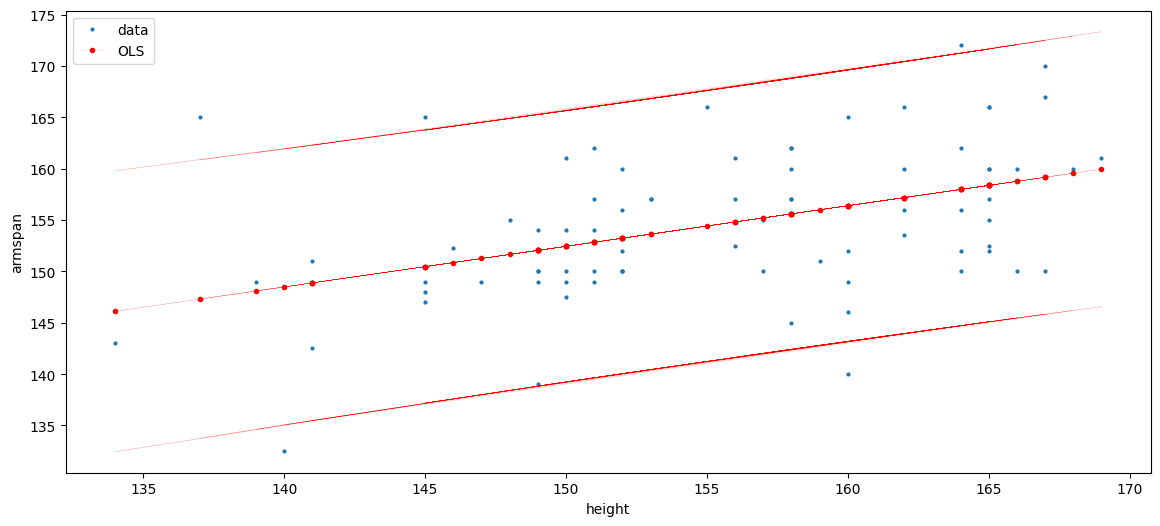

In [8]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(X[:,1], y, "o", label="data", markersize=2)
ax.plot(X[:,1], res.fittedvalues, "r--.", label="OLS", linewidth = 0.1)
#ax.plot(X[:,1], X[:,[0,1]] @ res.params[[0,1]], label = 'comp1')
#ax.plot(X[:,2], X[:,[0,2]] @ res.params[[0,2]], label = 'comp2')
ax.plot(X[:,1], iv_u, "r--", linewidth = 0.1)
ax.plot(X[:,1], iv_l, "r--", linewidth = 0.1)
ax.set_xlabel('height')
ax.set_ylabel('armspan')
ax.legend(loc="best")
plt.show()

In [9]:
'''ax = plt.figure(figsize=(14, 8)).add_subplot(projection='3d')
ax.view_init(20, 255)
ax.plot(X[:,1], X[:,2], y.reshape((-1)), 'o', markersize = 3)
ax.plot(X[:,1], X[:,2], res.fittedvalues.reshape((-1)), 'o', markersize=3)
ax.legend()
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()'''

"ax = plt.figure(figsize=(14, 8)).add_subplot(projection='3d')\nax.view_init(20, 255)\nax.plot(X[:,1], X[:,2], y.reshape((-1)), 'o', markersize = 3)\nax.plot(X[:,1], X[:,2], res.fittedvalues.reshape((-1)), 'o', markersize=3)\nax.legend()\nax.set_xlabel('X Label')\nax.set_ylabel('Y Label')\nax.set_zlabel('Z Label')\nplt.show()"